# **Importing Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv("../Data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.shape

(20640, 10)

**(Number of Rows , Number of Columns)**

In [7]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

# **Menemukan Nilai Unik**

In [8]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']
for i in columns:
    print(i+" "+ str(df[i].unique))

longitude <bound method Series.unique of 0       -122.23
1       -122.22
2       -122.24
3       -122.25
4       -122.25
          ...  
20635   -121.09
20636   -121.21
20637   -121.22
20638   -121.32
20639   -121.24
Name: longitude, Length: 20640, dtype: float64>
latitude <bound method Series.unique of 0        37.88
1        37.86
2        37.85
3        37.85
4        37.85
         ...  
20635    39.48
20636    39.49
20637    39.43
20638    39.43
20639    39.37
Name: latitude, Length: 20640, dtype: float64>
housing_median_age <bound method Series.unique of 0        41.0
1        21.0
2        52.0
3        52.0
4        52.0
         ... 
20635    25.0
20636    18.0
20637    17.0
20638    18.0
20639    16.0
Name: housing_median_age, Length: 20640, dtype: float64>
total_rooms <bound method Series.unique of 0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Nam

# **Memeriksa Missing Values**

In [9]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**Treating Null Values :**

Menghilangkan **207 null values** dari kumpulan data perumahan California, yang berisi lebih dari **20,000 rows**, merupakan pendekatan yang wajar untuk menangani data yang hilang, karena data tersebut mewakili kurang dari 1% dari total kumpulan data. Sebagian kecil nilai yang hilang ini **tidak mungkin** berdampak signifikan terhadap distribusi atau analisis data secara keseluruhan. Dengan menghilangkan baris-baris ini, kami memastikan bahwa kumpulan data yang tersisa bersih dan **free of inconsistenciesn**, yang membantu meningkatkan keandalan dan keakuratan model yang digunakan.

Lebih jauh, pendekatan ini **menghindari potensi bias atau ketidakakuratan** yang dapat timbul dari imputasi nilai yang hilang, terutama jika yang hilang tersebut tidak mengikuti pola tertentu atau jika kumpulan data cukup besar untuk mempertahankan integritasnya tanpa baris-baris ini. Oleh karena itu, **menghilangkan 207 nilai null merupakan keputusan pragmatis yang menyeimbangkan kualitas data dengan kebutuhan akan data yang cukup untuk analisis.**

In [10]:
df1 = df.dropna()
df1.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

# **Memvisualisasikan Data**

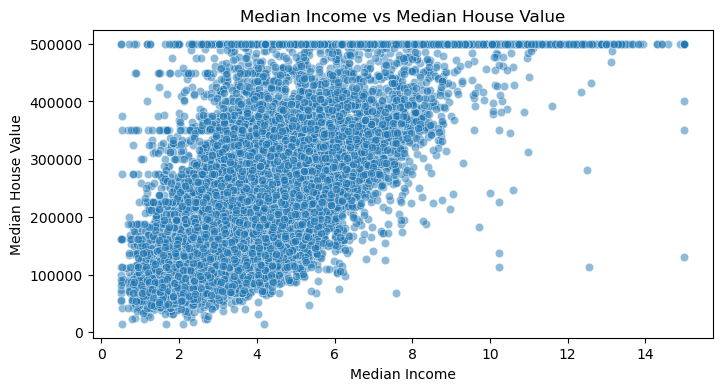

In [12]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df1,x="median_income",y="median_house_value",alpha=0.5)
plt.title("Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()

Menganalisis **Pendapatan Median vs. Nilai Rumah Median** sangat penting untuk memahami interaksi antara tingkat pendapatan dan harga perumahan, menjadikannya langkah berharga dalam **analisis data eksploratif (EDA) dan pemodelan prediktif.**

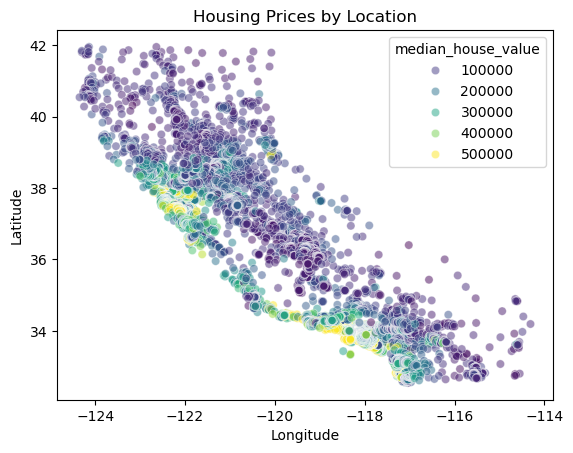

In [13]:
sns.scatterplot(data=df1,x="longitude",y="latitude",hue="median_house_value",palette="viridis",alpha=0.5)
plt.title("Housing Prices by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Menganalisis **harga perumahan berdasarkan lokasi** memberikan wawasan yang sangat berharga mengenai distribusi spasial biaya perumahan dan faktor-faktor pendorongnya. Analisis ini sangat penting untuk memahami dinamika pasar, mendukung pemodelan prediktif, dan memandu keputusan kebijakan untuk memenuhi kebutuhan perumahan secara efektif.

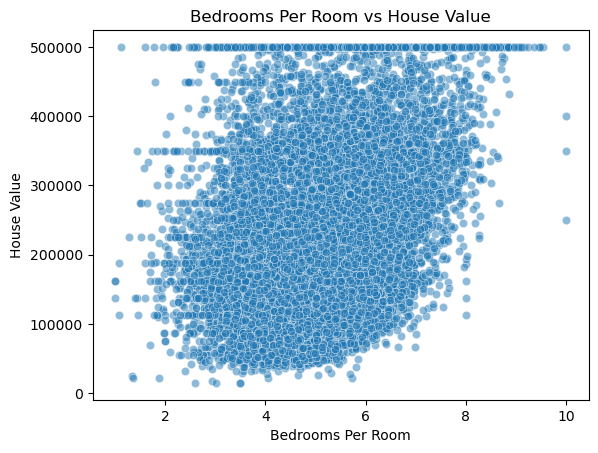

In [14]:
df1["bedrooms_per_room"] = df1["total_rooms"]/ df1["total_bedrooms"] 
sns.scatterplot(data=df1,x="bedrooms_per_room",y="median_house_value",alpha=0.5)
plt.title("Bedrooms Per Room vs House Value")
plt.xlabel("Bedrooms Per Room")
plt.ylabel("House Value")
plt.show()

Tujuan menganalisis hubungan antara **Kamar Tidur Per Kamar dan Nilai Rumah** dalam kumpulan data seperti kumpulan data perumahan California adalah untuk memahami bagaimana proporsi kamar tidur relatif terhadap total kamar di sebuah properti memengaruhi nilai pasarnya. Analisis ini memberikan wawasan berharga tentang karakteristik perumahan dan membantu dalam rekayasa fitur dan pengambilan keputusan.

In [15]:
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.821705
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.418626
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.721053
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.421277
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,5.810714


**Dropping Columns with Categorical Values to draw Correlation Matrix :**

In [16]:
df2 = df1.drop(["ocean_proximity"],axis="columns")

# **Correlation Matrix**

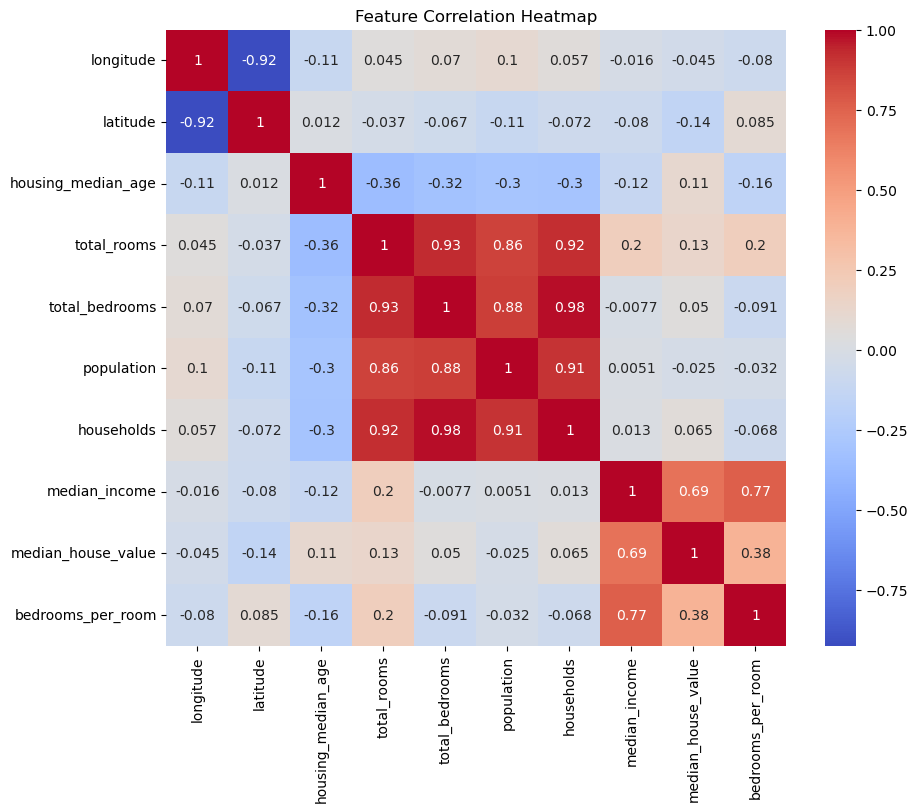

In [17]:
correlation_matrix = df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

## **Dealing with Categorical Values :**

In [18]:
dummy_values= pd.get_dummies(df1.ocean_proximity).astype(int)
dummy_values.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [19]:
df2 = pd.concat([df1,dummy_values.drop("NEAR OCEAN",axis=1)],axis=1)
df2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.821705,0,0,0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.418626,0,0,0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.721053,0,0,0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.421277,0,0,0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,5.810714,0,0,0,1


In [20]:
df3 = df2.drop("ocean_proximity",axis=1)
df3.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.821705,0,0,0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.418626,0,0,0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,7.721053,0,0,0,1


In [21]:
df3.shape

(20433, 14)

In [22]:
X = df3.drop("median_house_value",axis=1)
y = df3["median_house_value"]

**Splitting Data For training and testing :**

In [23]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.8,random_state=10)

**Linear Regression :**

In [24]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

0.6430093452265554

**Ridge Regression (L2 Regularization) :**

In [25]:
from sklearn.linear_model import Ridge
r_model = Ridge(alpha=1.0)  
r_model.fit(X_train, y_train)
r_model.score(X_test,y_test)


0.6430084991258234

**Lasso Regression (L1 Regularization) :**

In [26]:
from sklearn.linear_model import Lasso
l_model = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
l_model.fit(X_train, y_train)
l_model.score(X_test,y_test)


0.6430093061631099

**Decision Tree Regression :**

In [27]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=5)  # Control depth to avoid overfitting
dt_model.fit(X_train, y_train)
dt_model.score(X_test,y_test)


0.6250841380236926

**Random Forest Regression :**

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_model.score(X_test,y_test)



0.827841989927216

# **Menentukan model yang cocok**

In [29]:
models = {
    'Linear Regression': l_model,
    'Ridge Regression': r_model,
    'Lasso Regression': lr_model,
    'DecisionTree Regressor' : dt_model,
    'Random Forest': rf_model
}
results={}
from sklearn.metrics import mean_squared_error, r2_score
for name,model in models.items():
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_score = model.score(X_test,y_test)
    results[name] = {'RMSE': rmse, 'R²': r2, 'Model Score' : model_score}

results_df = pd.DataFrame(results).T
results_df

,RMSE,R²,Model Score
Linear Regression,4.696379e+09,0.643009,0.643009
Ridge Regression,4.696390e+09,0.643008,0.643008
Lasso Regression,4.696379e+09,0.643009,0.643009
DecisionTree Regressor,4.932193e+09,0.625084,0.625084
Random Forest,2.264819e+09,0.827842,0.827842


# **Conclusion**

Kesimpulannya, teknik regresi **Random Forest** terbukti paling sesuai untuk memprediksi **harga perumahan di California** dalam analisis ini. Teknik ini secara konsisten mengungguli model lain, menghasilkan **skor R² yang tinggi dan RMSE yang rendah**, yang menunjukkan daya prediksi yang kuat dan kemampuan untuk menangkap hubungan yang kompleks dalam kumpulan data.
Algoritme Random Forest, sebagai **metode ensemble**, diuntungkan dari kemampuannya untuk menangani non-linieritas dan interaksi antara beberapa fitur, yang sangat penting untuk kumpulan data perumahan California, di mana faktor-faktor seperti lokasi, kedekatan dengan laut, dan karakteristik regional lainnya memainkan peran penting dalam menentukan harga perumahan. Selain itu, ketahanannya terhadap overfitting dan kemampuan untuk menangani kumpulan data besar dengan banyak fitur menjadikannya pilihan yang ideal untuk jenis masalah ini. **Secara keseluruhan, Random Forest memberikan solusi yang sangat akurat, andal, dan dapat ditafsirkan untuk tugas prediksi harga perumahan di California.**

## Saving Model Random Forest

In [31]:
import joblib

joblib.dump(rf_model, './Deploy/random_forest_california-housing.joblib')
print("Model Random Forest berhasil disimpan!")

Model Random Forest berhasil disimpan!
